In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from ivan.data.dataset import ElectroInterDataset
from ivan.model.unet import UNet
from ivan.data.processing import create_mask_from_image, create_image_from_mask, test_on_image

import numpy as np
from tqdm.auto import tqdm
import torch
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt

In [3]:
DATA_PATH = "../data/processed"
MODEL_SAVE_PATH = "../data/models/unet"
EPOCHS = 100
DEVICE = "cuda"

## Train part
Если хочешь просто потестить обученную модель, перейди в раздел в конце `TEST ZONE`

In [4]:
dataset = ElectroInterDataset(DATA_PATH)
train_dataloader = DataLoader(dataset, batch_size=1, shuffle=True)

In [5]:
vis_idx = 0

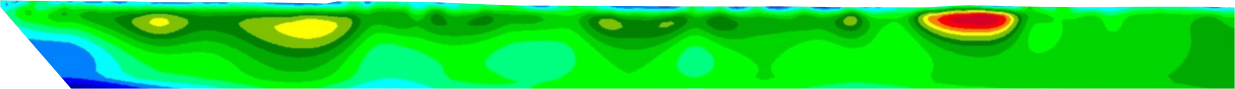

In [6]:
dataset.get_sample(vis_idx)[0]

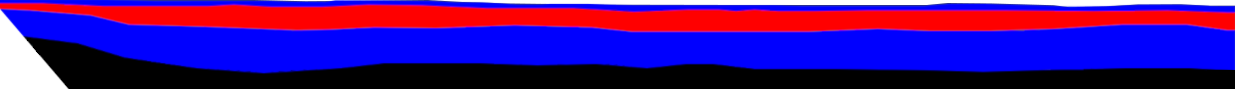

In [7]:
dataset.get_sample(vis_idx)[1]

In [8]:
model = UNet(4, 17).to(DEVICE)
opt = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

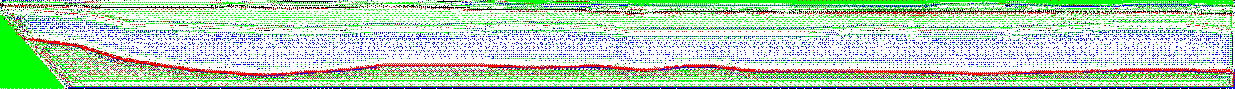

In [9]:
test_on_image(model, dataset.get_sample(vis_idx)[1])

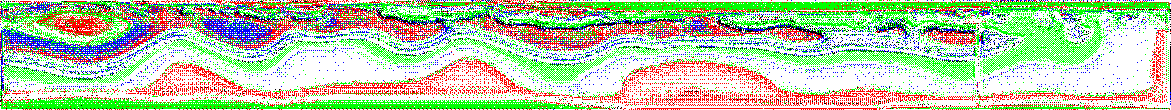

In [10]:
test_on_image(model, "../data/raw/Fragment_3_uchastok_7_dlya_itoga.png")

In [11]:
loss_func = torch.nn.CrossEntropyLoss(ignore_index=0)

In [12]:
loss_history = []
generated_images_history = []
log_step = 10

In [13]:
torch.save(model.state_dict(), MODEL_SAVE_PATH)

In [14]:
for epoch in tqdm(range(EPOCHS)):
    for images, labels in train_dataloader:
        images, labels = images.to(DEVICE), labels.to(DEVICE)
        
        model.zero_grad()
        generated_images = model(images)
        loss = loss_func(generated_images, labels)
        loss.backward()
        
        loss_history.append(loss.item())
        if epoch % log_step == 0:
            generated_images_history.append(generated_images)
        opt.step()
torch.save(model.state_dict(), MODEL_SAVE_PATH)

  0%|          | 0/100 [00:00<?, ?it/s]

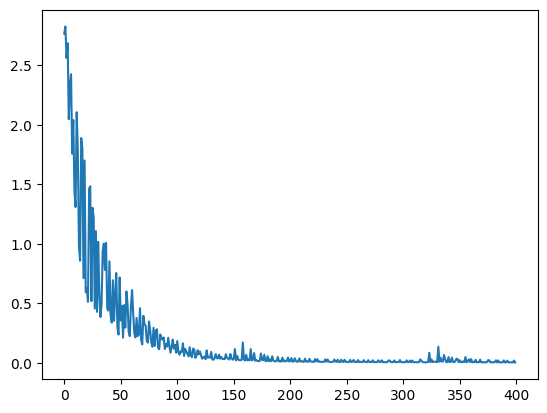

In [15]:
plt.plot(loss_history)

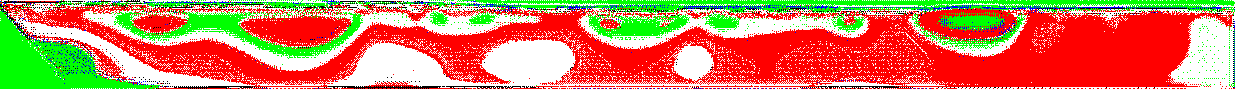

In [16]:
create_image_from_mask(torch.argmax(generated_images_history[3], dim=1)[0].cpu().numpy())

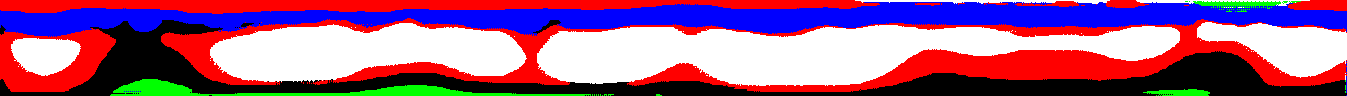

In [17]:
create_image_from_mask(torch.argmax(generated_images_history[7], dim=1)[0].cpu().numpy())

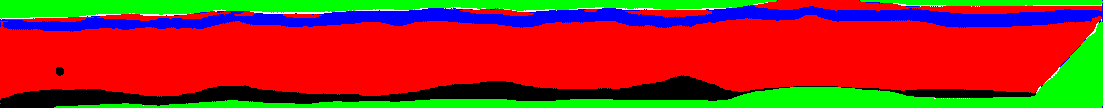

In [18]:
create_image_from_mask(torch.argmax(generated_images_history[11], dim=1)[0].cpu().numpy())

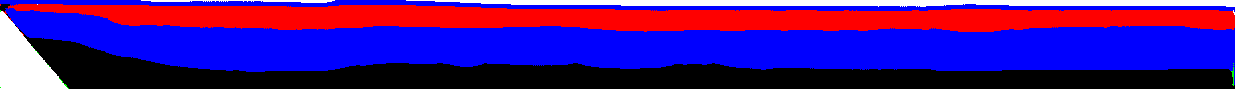

In [19]:
create_image_from_mask(torch.argmax(generated_images_history[15], dim=1)[0].cpu().numpy())

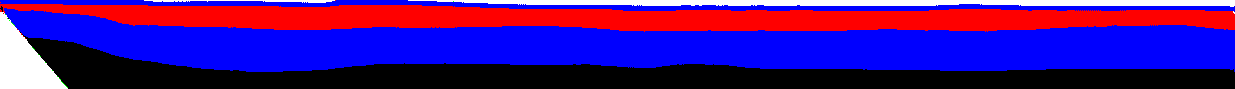

In [20]:
create_image_from_mask(torch.argmax(generated_images_history[20], dim=1)[0].cpu().numpy())

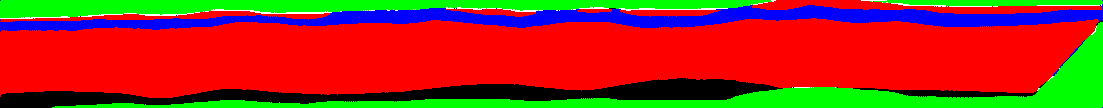

In [21]:
create_image_from_mask(torch.argmax(generated_images_history[27], dim=1)[0].cpu().numpy())

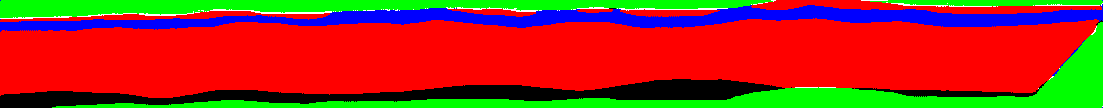

In [22]:
create_image_from_mask(torch.argmax(generated_images_history[32], dim=1)[0].cpu().numpy())

# TEST ZONE

In [23]:
model = UNet(4, 17).to(DEVICE)
model.load_state_dict(torch.load(MODEL_SAVE_PATH))

<All keys matched successfully>

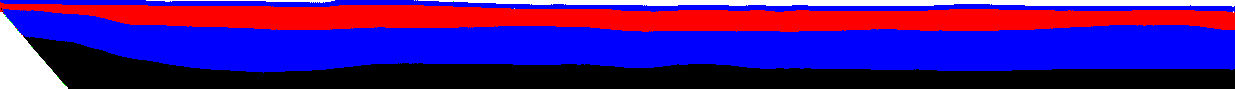

In [24]:
test_on_image(model, "../data/processed/images/01_09.png")

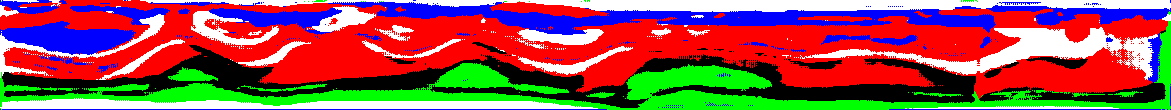

In [25]:
test_on_image(model, "../data/raw/Fragment_3_uchastok_7_dlya_itoga.png")